<a href="https://colab.research.google.com/github/radhakrishnan-omotec/biological_eye/blob/main/RK_Epoch20_Project20_Biological_Eye_C3AE_Notebook_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> ## **`Clone Repo`**



In [1]:
!git clone https://github.com/radhakrishnan-omotec/biological_eye.git

Cloning into 'biological_eye'...
remote: Enumerating objects: 1252, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 1252 (delta 6), reused 9 (delta 4), pack-reused 1236
Receiving objects: 100% (1252/1252), 74.39 MiB | 22.79 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Updating files: 100% (1083/1083), done.




> ## **`Download Datasets`**



In [4]:
#download imdb
#!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar
#download WIKI
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar

--2023-07-21 14:23:12--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811315200 (774M) [application/x-tar]
Saving to: ‘wiki_crop.tar.1’

wiki_crop.tar.1     100%[===================>] 773.73M  6.74MB/s    in 1m 57s  

2023-07-21 14:25:10 (6.63 MB/s) - ‘wiki_crop.tar.1’ saved [811315200/811315200]



In [8]:
#extract IMDB-WIKI datasets
!tar -xvf /content/imdb_crop.tar -C /content/biological_eye/C3AE_keras/datasets/
#!tar -xvf /content/wiki_crop.tar -C /content/biological_eye/C3AE_keras/datasets/
# morph data
# !tar -xvf Morph.tar -C /content/C3AE/dataset

Streaming output truncated to the last 5000 lines.
imdb_crop/98/nm0232998_rm2180228352_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2200475648_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2232200192_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2267584512_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2331093504_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2384117504_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2465311232_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2534190080_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2549197312_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2563156736_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2579933952_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2683415040_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2688802304_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2739898368_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2756675584_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm276465664_1968-5-11_2007.jpg
imdb_crop/98/nm0232998_rm2837228288_1968-5-11_2007.jpg
imdb_crop/98/nm



> ## **`Preprocess Datasets`**



In [9]:
cd /content/biological_eye/C3AE_keras

/content/biological_eye/C3AE_keras


In [11]:
#Wiki-IDMB
!python /content/biological_eye/C3AE_keras/preprocessing_scripts/preprocess_WIKI-IMDB.py
#Morph
# !python /content/biological_eye/C3AE_keras/preprocessing_scripts/preprocess_Morph.py

/content/biological_eye/C3AE_keras/preprocessing_scripts/preprocess_WIKI-IMDB.py:124: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  image_buffer = buf.tostring()
0 images preprocessed
4 Some part of face is out of image  /content/biological_eye/C3AE_keras/datasets/wiki_crop/16/10002116_1971-05-31_2012.jpg
351 Some part of face is out of image  /content/biological_eye/C3AE_keras/datasets/wiki_crop/47/3001247_1985-09-30_2014.jpg
416 Some part of face is out of image  /content/biological_eye/C3AE_keras/datasets/wiki_crop/87/30064987_1992-11-19_2011.jpg
500 images preprocessed
597 Some part of face is out of image  /content/biological_eye/C3AE_keras/datasets/wiki_crop/20/70020_1896-01-20_1986.jpg
1049 Some part of face is out of image  /content/biological_eye/C3AE_keras/datasets/wiki_crop/50/31038450_1981-12-06_2015.jpg
1292 Some part of face is out of image  /content/biological_eye/C3AE_keras/datasets/wiki_crop/80/610980_1968-01-01_2008.jpg
1500 images preprocesse



> ## **`Train`**



In [12]:
cd /content/biological_eye/C3AE_keras

/content/biological_eye/C3AE_keras


In [13]:
!pip install feather-format

  Preparing metadata (setup.py) ... done
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2440 sha256=a7d810d928d200b475c9b7957fd2b442ad2ba806284b244f73f438349109ac4e
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5ddef243c97f13c6cf579d7353d659e41a05c3a6
Successfully built feather-format


In [14]:
from pathlib import Path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import dlib
from net_training import C3AE_net,training_utils
import feather
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau
from keras.losses import kl_divergence,mae
from keras.metrics import mae
import tensorflow as tf

In [21]:
# initializing params
category = 10
dropout = 0.2
seed = 2019
category = category + 2
interval = 10

In [22]:
# Loading dataset (from .feather file)
dataset_dir = Path('/content/biological_eye/C3AE_keras/datasets/wiki_crop/')
dataset_df = pd.DataFrame(columns=["age", "gender", "image", "org_box", "trible_box", "landmarks", "roll", "yaw", "pitch"])
for fnames in dataset_dir.glob('*.feather'):
  df_chunk = feather.read_dataframe(dataset_dir.joinpath(fnames))
  dataset_df = pd.concat([dataset_df,df_chunk],ignore_index=True)
dataset_df.shape

(30378, 12)

In [23]:
#validation split using sklearn.model_selection.train_test_split
trainset, testset = train_test_split(dataset_df, train_size=0.8, test_size=0.2, random_state=seed)

In [24]:
# making a generator for image and dataset. inside generator we
#load img, crop faces (3 sizes -> big,middle,small) then tranform (if aumentation is true) rotate,birhgt etc ect
# convert age into 2 point represenation (like on hot encoding)
input_imgs_shape = (64,64) # input image shape to network
batch_size = 32
require_data_augmentation = False # if this is true, then random noise will be added to images, e.g rotation, brightness, hue etc
train_gen = C3AE_net.preprocessing(trainset,batch_size=batch_size, category=category, interval=interval,input_imgs_shape=input_imgs_shape,augmentation=require_data_augmentation,dropout=dropout)
validation_gen = C3AE_net.preprocessing(testset, augmentation=require_data_augmentation, category=category, interval=interval)
print(trainset.groupby(["age"])["age"].agg("count"))

age
0.0      1
1.0      2
3.0      3
5.0      2
6.0      5
        ..
96.0     5
97.0     2
98.0     4
99.0     4
100.0    7
Name: age, Length: 99, dtype: int64


In [25]:
#checking generator working fine!
index = 10
for i in train_gen:
  print(i[1][0][index],i[1][1][index])
  break

63.0 [0.  0.  0.  0.  0.  0.  0.7 0.3 0.  0.  0.  0. ]


In [26]:
# just to check how versatile is our dataset
# get distribution of ages i.e how many number of rows for each interval i.e lets say for 0-10 years age we have 5000 entries(rows)
age_distribution = [trainset["age"][(trainset.age >= x -10) & (trainset.age <= x)].count() for x in range(10, 101, 10)]
age_distribution = [age_distribution[0]] + age_distribution + [age_distribution[-1]]
print(age_distribution)

[44, 44, 1702, 8740, 5615, 3967, 3045, 1950, 1069, 455, 102, 102]


In [27]:
se_net = True # if true, then network will contain SE_Block (GAP + FC + mul), which improved results.
using_white_norm = True # if true, then network will contain white_normlization block, which will normalize image brightness and colors. (for better accuracy)
models = C3AE_net.build_net(Categories = category, using_SE=se_net, using_white_norm=using_white_norm)

# add pretrain weights if exist
pretrain_weights_path = Path("/content/biological_eye/C3AE_keras/models_saved/wiki_trained__age_mae_7.7194.h5")
if Path.is_file(pretrain_weights_path):
  models.load_weights(pretrain_weights_path)

In [28]:
lr = 0.1
adam = Adam(lr=lr)
#cate_weight = K.variable(params.weight_factor)
weight_factor = 10
models.compile(
    optimizer=adam,
    loss = {'W1':kl_divergence,'age':mae},
    metrics={"age": mae},
    loss_weights={'W1':weight_factor, 'age': 1}
)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
models.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 model (Functional)             (None, 512)          35504       ['input_2[0][0]',                
                                                                  'input_3[0][0]',          

In [30]:
class lr_Callback(tf.keras.callbacks.Callback):
  def on_epoch_begin(self, batch, logs={}):
      # Get the current learning rate from model's optimizer.
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      print('current epoch lr is: {} '.format(lr))

In [31]:
save_path = '/content/biological_eye/C3AE_keras/models_saved/'
callbacks = [
  ModelCheckpoint(save_path+'WIKI-weights.{epoch:02d}-{val_age_mean_absolute_error:.2f}.hdf5',
                  monitor='val_age_mean_absolute_error',
                  verbose = 1,
                  save_best_only=True,
                  model ='min'),

  ReduceLROnPlateau(monitor='val_age_mean_absolute_error', #considered metric
                    factor = 0.5, # learning_rate * factor (multiply lr 0.5 to reduce it by 50%)
                    patience = 2,# if loss didnt improve this much epochs, then update lr
                    min_delta = 0.01, # if model didnt improve this much
                    cooldown = 1, # after lr updated, wait this many epochs before apply new lr
                    min_lr = 0.001, # lower limit of lr
                    mode = 'min'), # loss should go up (max) or down (min)
  lr_Callback() # print lr on each epoch, to analyze lr performance.
]

In [32]:
print("Callbacks = ", callbacks)

Callbacks =  [<keras.callbacks.ModelCheckpoint object at 0x7f73d0ef24a0>, <keras.callbacks.ReduceLROnPlateau object at 0x7f73d0ef3ac0>, <__main__.lr_Callback object at 0x7f73ac350730>]


In [33]:
epochs=20
history = models.fit(train_gen, steps_per_epoch=len(trainset) / batch_size, epochs=epochs, callbacks=callbacks, validation_data=validation_gen, validation_steps=len(testset) / batch_size * 3)

current epoch lr is: 0.10000000149011612 
Epoch 1/20
760/759 [==============================] - ETA: 0s - loss: 16.9828 - age_loss: 7.5616 - W1_loss: 0.9421 - age_mean_absolute_error: 7.5616
Epoch 1: val_age_mean_absolute_error improved from inf to 8.10490, saving model to /content/biological_eye/C3AE_keras/models_saved/WIKI-weights.01-8.10.hdf5
759/759 [==============================] - 729s 951ms/step - loss: 16.9828 - age_loss: 7.5616 - W1_loss: 0.9421 - age_mean_absolute_error: 7.5616 - val_loss: 18.2076 - val_age_loss: 8.1049 - val_W1_loss: 1.0103 - val_age_mean_absolute_error: 8.1049 - lr: 0.1000
current epoch lr is: 0.10000000149011612 
Epoch 2/20
760/759 [==============================] - ETA: 0s - loss: 16.8072 - age_loss: 7.4770 - W1_loss: 0.9330 - age_mean_absolute_error: 7.4770
Epoch 2: val_age_mean_absolute_error did not improve from 8.10490
759/759 [==============================] - 710s 935ms/step - loss: 16.8072 - age_loss: 7.4770 - W1_loss: 0.9330 - age_mean_absolute_e

In [34]:
print(history.history.keys())

dict_keys(['loss', 'age_loss', 'W1_loss', 'age_mean_absolute_error', 'val_loss', 'val_age_loss', 'val_W1_loss', 'val_age_mean_absolute_error', 'lr'])


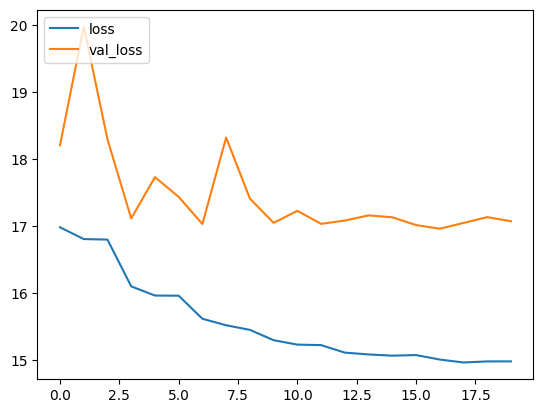

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

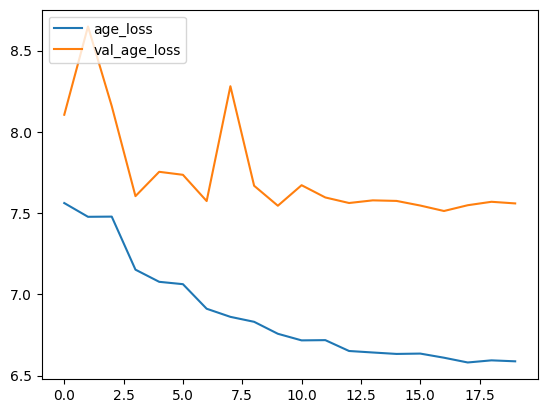

In [36]:
plt.plot(history.history['age_loss'])
plt.plot(history.history['val_age_loss'])
plt.legend(['age_loss', 'val_age_loss'], loc='upper left')
plt.show()

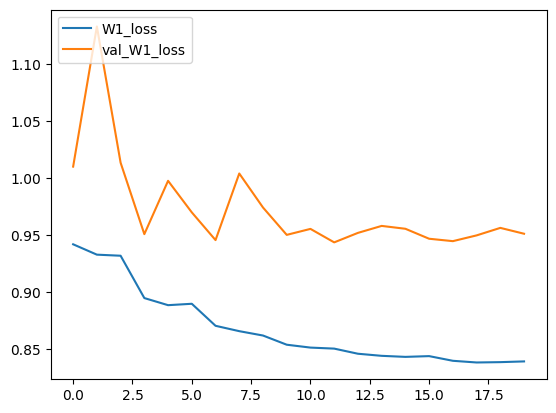

In [37]:
plt.plot(history.history['W1_loss'])
plt.plot(history.history['val_W1_loss'])
plt.legend(['W1_loss', 'val_W1_loss'], loc='upper left')
plt.show()

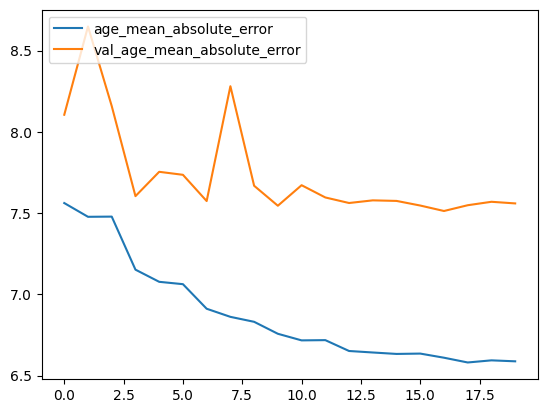

In [38]:
plt.plot(history.history['age_mean_absolute_error'])
plt.plot(history.history['val_age_mean_absolute_error'])
plt.legend(['age_mean_absolute_error', 'val_age_mean_absolute_error'], loc='upper left')
plt.show()



> ## **`Inference`**






In [39]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/biological_eye/C3AE_keras/detector/shape_predictor_68_face_landmarks.dat")
print("Predictor =" , predictor)
def gen_face(image):
  face_rect_list = detector(image)
  xmin, ymin, xmax, ymax = face_rect_list[0].left() , face_rect_list[0].top(), face_rect_list[0].right(), face_rect_list[0].bottom() # face_rect is dlib.rectangle object, so extracting values from it
  lmarks_list = dlib.full_object_detections()
  for face_rect in face_rect_list:
    lmarks_list.append(predictor(image, face_rect)) # getting landmarks as a list of objects

  return np.array([xmin, ymin, xmax, ymax]), lmarks_list

def gen_boundbox(box, landmark):
    # getting 3 boxes for face, as required in paper... i.e feed 3 different sized images to network (R,G,B)
    xmin, ymin, xmax, ymax = box # box is [xmin, ymin, xmax, ymax]
    w, h = xmax - xmin, ymax - ymin
    nose_x, nose_y = (landmark.parts()[30].x, landmark.parts()[30].y) # calculating nose center point, so the triple boxes will be cropped according to nose point
    w_h_margin = abs(w - h)
    top2nose = nose_y - ymin
    # Contains the smallest frame
    return np.array([
        [(xmin - w_h_margin, ymin - w_h_margin), (xmax + w_h_margin, ymax + w_h_margin)],  # out
        [(nose_x - top2nose, nose_y - top2nose), (nose_x + top2nose, nose_y + top2nose)],  # middle
        [(nose_x - w//2, nose_y - w//2), (nose_x + w//2, nose_y + w//2)]  # inner box
    ])



Predictor = <_dlib_pybind11.shape_predictor object at 0x7f73a538aff0>


In [40]:
img = cv2.imread('/content/biological_eye/test.png',)
model = models
print("model = ",model)

model =  <keras.engine.functional.Functional object at 0x7f73ac185f90>


In [41]:
try:
    bounds, lmarks = gen_face(img)
except Exception as e:
  print(e)

padding = 200
new_bd_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_CONSTANT)
print("new_bd_img = ",new_bd_img)

new_bd_img =  [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [42]:
for pidx,landmarks in enumerate(lmarks):
    trible_box = gen_boundbox(bounds, landmarks)
    tri_imgs = []
    for bbox in trible_box:
        bbox = bbox
        h_min, w_min = bbox[0]
        h_max, w_max = bbox[1]
        cropped_resized_img = cv2.resize(new_bd_img[w_min:w_max, h_min:h_max], (64, 64))
        final_img = np.expand_dims(cropped_resized_img,axis=0)
        tri_imgs.append(final_img)
    print(np.array(tri_imgs).shape)

(3, 1, 64, 64, 3)


In [43]:
result = models.predict(tri_imgs)

1/1 [==============================] - 1s 1s/step


In [44]:
print("Age is: ",result[0][0][0])

Age is:  60.756653
